In [57]:
import torch
import torchvision
from torchvision.datasets import MNIST
from torchvision import transforms

In [58]:
# dataset = MNIST(root='data/',download=True)

In [59]:
dataset=MNIST(root='data/',train=True)

In [60]:
len(dataset)

60000

In [61]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [62]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

5


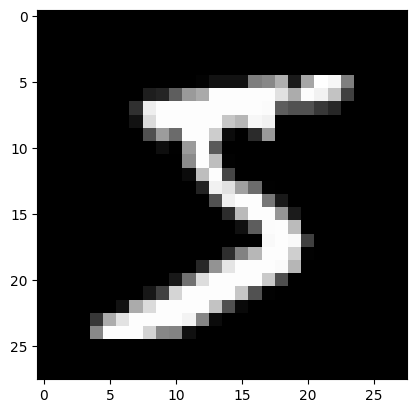

In [64]:
image,label = dataset[0]
plt.imshow(image, cmap='gray')
print(label)

0


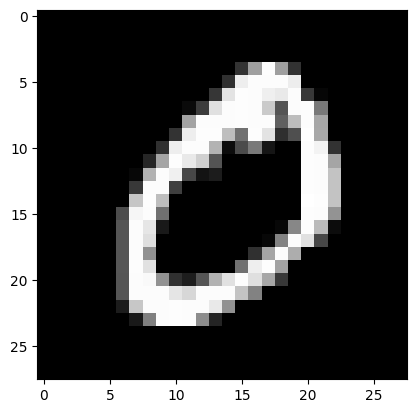

In [65]:
image,label = dataset[1]
plt.imshow(image, cmap='gray')
print(label)

In [66]:
dataset = MNIST(root = 'data/',train = True, transform=transforms.ToTensor())

In [67]:
image_tensor,label = dataset[0]
print(image_tensor.shape,label)


torch.Size([1, 28, 28]) 5


In [68]:
print(image_tensor[0,10:15,10:15])
print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


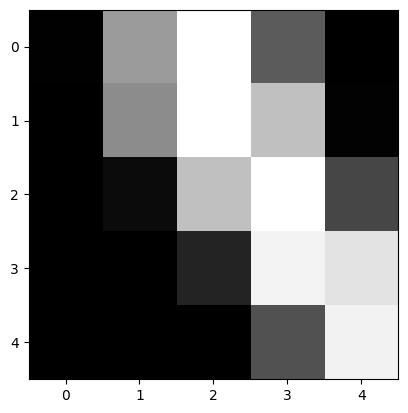

In [69]:
plt.imshow(image_tensor[0,10:15,10:15],cmap='gray')


In [70]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset, [50000,10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [71]:
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds, batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)

In [72]:
import torch.nn as nn 
input_size = 28*28
num_classes = 10

model = nn.Linear(input_size,num_classes)

In [73]:
print(model.weight.shape, model.bias.shape)


torch.Size([10, 784]) torch.Size([10])


In [74]:
model.weight

Parameter containing:
tensor([[ 0.0340, -0.0331,  0.0356,  ..., -0.0341, -0.0046,  0.0257],
        [ 0.0148, -0.0146, -0.0288,  ..., -0.0289,  0.0318, -0.0268],
        [-0.0353,  0.0221, -0.0018,  ..., -0.0224,  0.0169,  0.0098],
        ...,
        [ 0.0110, -0.0057,  0.0157,  ..., -0.0003,  0.0160, -0.0176],
        [-0.0161,  0.0132,  0.0034,  ..., -0.0202,  0.0009,  0.0269],
        [-0.0320, -0.0245,  0.0166,  ...,  0.0043, -0.0052,  0.0258]],
       requires_grad=True)

In [75]:
model.bias

Parameter containing:
tensor([-0.0099,  0.0281,  0.0078,  0.0023, -0.0122, -0.0240, -0.0013,  0.0268,
        -0.0169, -0.0249], requires_grad=True)

In [76]:
for images,labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([9, 1, 6, 9, 5, 4, 9, 0, 9, 6, 3, 2, 5, 8, 1, 7, 3, 2, 3, 8, 0, 3, 3, 0,
        0, 8, 9, 8, 9, 9, 9, 8, 9, 2, 7, 6, 7, 0, 0, 4, 0, 9, 9, 9, 7, 2, 6, 6,
        3, 1, 5, 8, 8, 1, 4, 2, 6, 4, 1, 0, 7, 8, 3, 8, 7, 9, 0, 5, 4, 4, 3, 6,
        7, 7, 2, 1, 5, 6, 3, 4, 5, 8, 9, 4, 0, 9, 8, 8, 1, 0, 7, 8, 6, 8, 2, 1,
        1, 3, 3, 3, 0, 1, 6, 1, 7, 8, 2, 0, 8, 6, 6, 5, 4, 0, 8, 3, 2, 7, 0, 6,
        3, 7, 8, 9, 7, 6, 0, 9])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
    
    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
model = MnistModel()

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
model.linear.weight.shape,model.linear.bias.shape

(torch.Size([10, 784]), torch.Size([10]))

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0029,  0.0255, -0.0022,  ...,  0.0260,  0.0292,  0.0056],
         [-0.0200, -0.0184, -0.0251,  ...,  0.0298, -0.0312, -0.0180],
         [ 0.0219,  0.0194, -0.0227,  ..., -0.0221,  0.0195,  0.0309],
         ...,
         [ 0.0270,  0.0166,  0.0090,  ..., -0.0318, -0.0257, -0.0109],
         [ 0.0010, -0.0210, -0.0282,  ..., -0.0024,  0.0272, -0.0085],
         [ 0.0108, -0.0335, -0.0207,  ..., -0.0194, -0.0085, -0.0342]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0069,  0.0163,  0.0144,  0.0166, -0.0357,  0.0187, -0.0256,  0.0306,
         -0.0271, -0.0059], requires_grad=True)]

In [ ]:
for images,labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break
print(f'output shape is: {outputs.shape}')    
print(f'sample outputs: {outputs[:2].data}')    

torch.Size([128, 1, 28, 28])
output shape is: torch.Size([128, 10])
sample outputs: tensor([[ 0.2234,  0.3574,  0.3455, -0.0202, -0.1115,  0.0872,  0.0972, -0.1771,
          0.0708,  0.2447],
        [-0.0608,  0.4609,  0.1840,  0.0537, -0.0370, -0.3621,  0.3088,  0.0186,
         -0.2832,  0.0503]])


In [ ]:
import torch.nn.functional as F

In [ ]:
outputs[:5
        ]

tensor([[ 0.2234,  0.3574,  0.3455, -0.0202, -0.1115,  0.0872,  0.0972, -0.1771,
          0.0708,  0.2447],
        [-0.0608,  0.4609,  0.1840,  0.0537, -0.0370, -0.3621,  0.3088,  0.0186,
         -0.2832,  0.0503],
        [ 0.2776,  0.4700,  0.4433,  0.2287,  0.1076,  0.0897,  0.4475, -0.2185,
         -0.2447,  0.2440],
        [ 0.2975,  0.3295,  0.2710,  0.1127, -0.0209, -0.1682,  0.0389, -0.2088,
         -0.2024, -0.0184],
        [ 0.2969,  0.3421,  0.1362,  0.2849, -0.0840,  0.1862,  0.1396, -0.1126,
         -0.0024,  0.1822]], grad_fn=<SliceBackward0>)

In [ ]:
probs = F.softmax(outputs,dim=1)
probs[:5]

tensor([[0.1102, 0.1260, 0.1245, 0.0864, 0.0788, 0.0961, 0.0971, 0.0738, 0.0946,
         0.1126],
        [0.0885, 0.1492, 0.1131, 0.0993, 0.0907, 0.0655, 0.1281, 0.0958, 0.0709,
         0.0989],
        [0.1067, 0.1294, 0.1259, 0.1016, 0.0900, 0.0884, 0.1265, 0.0650, 0.0633,
         0.1032],
        [0.1265, 0.1306, 0.1232, 0.1052, 0.0920, 0.0794, 0.0977, 0.0763, 0.0768,
         0.0923],
        [0.1161, 0.1214, 0.0988, 0.1147, 0.0793, 0.1039, 0.0992, 0.0771, 0.0860,
         0.1035]], grad_fn=<SliceBackward0>)

In [ ]:
max_probs,preds = torch.max(probs,dim=1)
preds,max_probs

(tensor([1, 1, 1, 1, 1, 2, 1, 6, 1, 1, 1, 1, 2, 6, 1, 1, 2, 2, 0, 0, 2, 9, 9, 1,
         6, 9, 6, 2, 1, 1, 6, 1, 0, 1, 1, 6, 1, 2, 6, 2, 6, 1, 1, 1, 6, 2, 1, 2,
         1, 1, 2, 2, 1, 6, 9, 6, 6, 1, 2, 2, 3, 9, 0, 1, 1, 0, 1, 2, 9, 2, 2, 9,
         1, 0, 2, 1, 1, 9, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 6, 2, 9,
         2, 1, 2, 2, 6, 1, 2, 1, 1, 2, 2, 1, 9, 1, 0, 2, 1, 1, 1, 1, 5, 1, 6, 2,
         6, 2, 2, 2, 2, 2, 2, 6]),
 tensor([0.1260, 0.1492, 0.1294, 0.1306, 0.1214, 0.1640, 0.1246, 0.1294, 0.1166,
         0.1183, 0.1427, 0.1468, 0.1487, 0.1224, 0.1446, 0.1458, 0.1337, 0.1307,
         0.1212, 0.1306, 0.1252, 0.1347, 0.1574, 0.1355, 0.1312, 0.1419, 0.1298,
         0.1246, 0.1228, 0.1191, 0.1309, 0.1414, 0.1347, 0.1348, 0.1259, 0.1238,
         0.1744, 0.1779, 0.1208, 0.1479, 0.1418, 0.1270, 0.1441, 0.1290, 0.1441,
         0.1550, 0.1650, 0.1249, 0.1373, 0.1581, 0.1160, 0.1470, 0.1193, 0.1108,
         0.1269, 0.1531, 0.1195, 0.1411, 0.1302, 0.1555, 0.1214, 0.1311, 0

In [ ]:
torch.sum(labels==preds)

tensor(10)

In [ ]:
def accuracy(outputs,labels):
    _,preds = torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [ ]:
accuracy(outputs,labels)

tensor(0.0781)

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3416, grad_fn=<NllLossBackward0>)


In [ ]:
# def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
#     optimizer = opt_func(model.parameters(), lr)
#     history = [] # for recording epoch-wise results
    
#     for epoch in range(epochs):
        
#         # Training Phase 
#         for batch in train_loader:
#             loss = model.training_step(batch)
#             loss.backward()
#             optimizer.step()
#             optimizer.zero_grad()
        
#         # Validation phase
#         result = evaluate(model, val_loader)
#         model.epoch_end(epoch, result)
#         history.append(result)

#     return history

# def evaluate(model, val_loader):
#     outputs = [model.validation_step(batch) for batch in val_loader]
#     return model.validation_epoch_end(outputs)

# class MnistModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.linear = nn.Linear(input_size, num_classes)
        
#     def forward(self, xb):
#         xb = xb.reshape(-1, 784)
#         out = self.linear(xb)
#         return out
    
#     def training_step(self, batch):
#         images, labels = batch 
#         out = self(images)                  # Generate predictions
#         loss = F.cross_entropy(out, labels) # Calculate loss
#         return loss
    
#     def validation_step(self, batch):
#         images, labels = batch 
#         out = self(images)                    # Generate predictions
#         loss = F.cross_entropy(out, labels)   # Calculate loss
#         acc = accuracy(out, labels)           # Calculate accuracy
#         return {'val_loss': loss, 'val_acc': acc}
        
#     def validation_epoch_end(self, outputs):
#         batch_losses = [x['val_loss'] for x in outputs]
#         epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
#         batch_accs = [x['val_acc'] for x in outputs]
#         epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
#         return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
#     def epoch_end(self, epoch, result):
#         print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
# model = MnistModel()

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.335644006729126, 'val_acc': 0.10818829387426376}

In [ ]:
def fit(epochs,lr,model,train_loader,val_loader,opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(),lr)
    history=[]
    
    for epoch in range(epochs):
        
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model,val_loader)
        model.epoch_end(epoch,result)
        history.append(result)
    
    return history

In [ ]:
def evaluate(model,val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,num_classes)
        
    def forward(self,xb):
        xb = xb.reshape(-1,784)
        out = self.linear(xb)
        return out
    
    def training_step(self,batch):
        images,labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        return loss
    
    def validation_step(self,batch):
        images,labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return{'val_loss':loss,'val_acc':acc}
    def validation_epoch_end(self,outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return{'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}
    
    def epoch_end(self,epoch,result):
         print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
         
model = MnistModel()

In [ ]:
result0 = evaluate(model,val_loader)
result0

{'val_loss': 2.3615143299102783, 'val_acc': 0.10007911175489426}

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9752, val_acc: 0.5889
Epoch [1], val_loss: 1.6982, val_acc: 0.7297
Epoch [2], val_loss: 1.4919, val_acc: 0.7668
Epoch [3], val_loss: 1.3366, val_acc: 0.7843
Epoch [4], val_loss: 1.2176, val_acc: 0.7973


In [ ]:
history2 = fit(5,00.001,model,train_loader,val_loader)

Epoch [0], val_loss: 1.1243, val_acc: 0.8076
Epoch [1], val_loss: 1.0496, val_acc: 0.8159
Epoch [2], val_loss: 0.9886, val_acc: 0.8197
Epoch [3], val_loss: 0.9380, val_acc: 0.8266
Epoch [4], val_loss: 0.8952, val_acc: 0.8297


In [ ]:
history3 = fit(5,00.001,model,train_loader,val_loader)

Epoch [0], val_loss: 0.8587, val_acc: 0.8345
Epoch [1], val_loss: 0.8270, val_acc: 0.8378
Epoch [2], val_loss: 0.7994, val_acc: 0.8388
Epoch [3], val_loss: 0.7749, val_acc: 0.8424
Epoch [4], val_loss: 0.7532, val_acc: 0.8437


In [ ]:
history4 = fit(5,00.001,model,train_loader,val_loader)

Epoch [0], val_loss: 0.7337, val_acc: 0.8458
Epoch [1], val_loss: 0.7162, val_acc: 0.8483
Epoch [2], val_loss: 0.7003, val_acc: 0.8497
Epoch [3], val_loss: 0.6857, val_acc: 0.8519
Epoch [4], val_loss: 0.6724, val_acc: 0.8531


In [ ]:
history5 = fit(10,00.0001,model,train_loader,val_loader)

Epoch [0], val_loss: 0.6712, val_acc: 0.8532
Epoch [1], val_loss: 0.6699, val_acc: 0.8536
Epoch [2], val_loss: 0.6687, val_acc: 0.8541
Epoch [3], val_loss: 0.6674, val_acc: 0.8543
Epoch [4], val_loss: 0.6662, val_acc: 0.8543
Epoch [5], val_loss: 0.6650, val_acc: 0.8545
Epoch [6], val_loss: 0.6638, val_acc: 0.8545
Epoch [7], val_loss: 0.6626, val_acc: 0.8548
Epoch [8], val_loss: 0.6614, val_acc: 0.8549
Epoch [9], val_loss: 0.6602, val_acc: 0.8551


In [ ]:
def fit(model,lr,opt_func=torch.optim.SGD,train_loader,val_loader,epochs):
    optimizer = opt_func(model.parameters(),lr)
    history = []
    for epoch in range(epochs):
        for batch in train_loader:
            loss = mdl.train_loss(batch)
            loss.backward()
            optimizer.step()
            optimizer.grad_zero()
        result = evaluate1(model,val_loader)
        model.epoch_end(epoch,result)
        history.append(result)
        
    return history
            

SyntaxError: non-default argument follows default argument (248429868.py, line 1)